In [64]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
plt.style.use('./accretion.mplstyle')

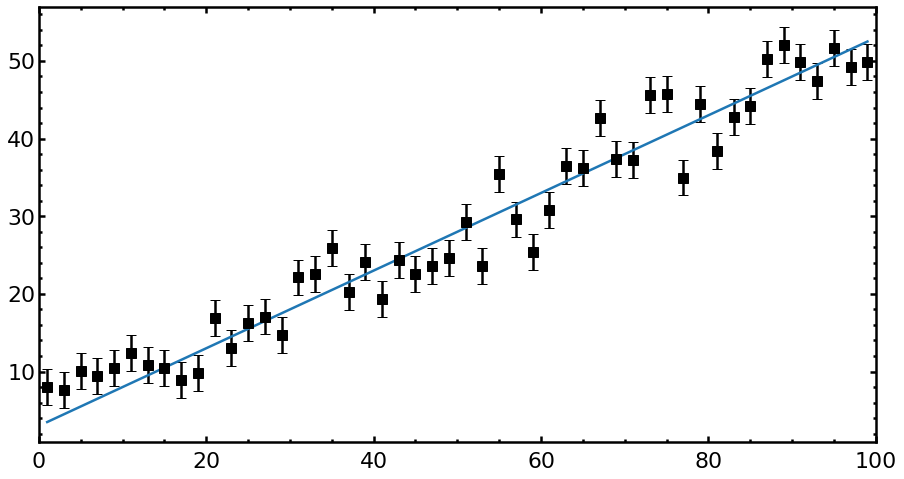

In [2]:
x = np.arange(1,100,2)
slope = 0.5
intercept = 3
y = x*slope+intercept
sigma = 3
error = np.random.normal(0,sigma)
y_noisy = np.array([y[i] + np.random.normal(0,sigma) for i in range(len(y))])

plt.errorbar(x,y_noisy,yerr=error,ls='none',capsize=5,marker='s',color='k')
plt.plot(x,y)
plt.xlim(0,100)
plt.show()

In [3]:
def model(m,x,b):
    y_model = m*x+b 
    return y_model

def lnp(m,x,b,data):
    sigma2 = sigma**2
    n = len(data)
    return - sum((data-model(m,x,b))**2)/2/sigma2 #-n/2*np.log(sigma2) - n/2*np.log(2*np.pi)


True values for y = mx + b
slope (m)	intercept (b)
  0.50		  3.00

Initial guess for y = mx + b
slope (m)	intercept (b)
  0.40		  2.90

Acceptance Fractions
m: 40.70%	b: 57.02%


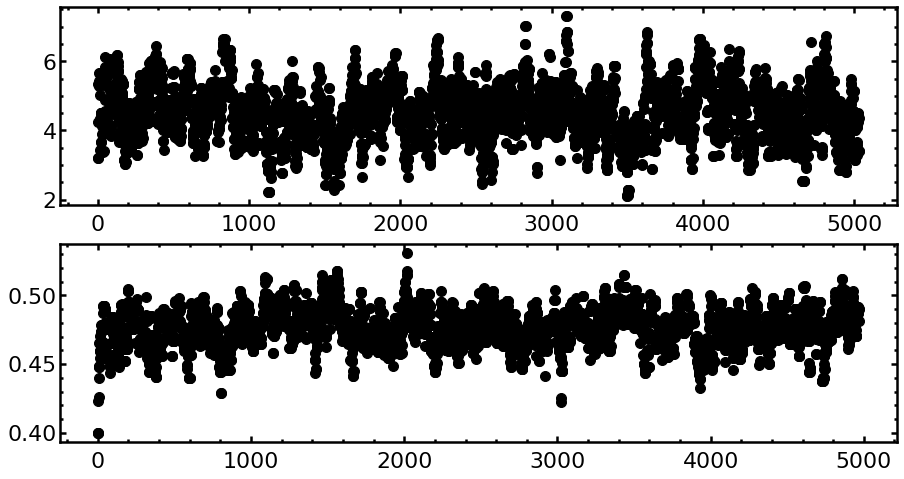

In [4]:
print(f'\nTrue values for y = mx + b\nslope (m)\tintercept (b)\n  {slope:.2f}\t\t  {intercept:.2f}')

intercept_guess = 2.9
slope_guess = 0.4
z = [intercept_guess,slope_guess]
intercept_step_size = 0.7
slope_step_size = 0.02
s = [intercept_step_size,slope_step_size]
print(f'\nInitial guess for y = mx + b\nslope (m)\tintercept (b)\n  {z[1]:.2f}\t\t  {z[0]:.2f}')
number_of_steps=10000

zs = [[0,0] for i in range(number_of_steps)]

m = z[1]
b = z[0]
lnp0 = lnp(m,x,b,y_noisy)

accepted=[0,0]
count=[0,0]
fig,ax = plt.subplots(2)
for step in range(number_of_steps):
    i = rand.randint(0,1)
    jump = s[i]*np.random.normal(0,1)
    new_z = z[:]
    new_z[i] += jump
    m = new_z[1]
    b = new_z[0]
    lnp1 = lnp(m,x,b,y_noisy)
    prob = min(1,np.exp(lnp1-lnp0))
    if prob > rand.uniform(0,1):
        z = new_z[:]
        accepted[i]+=1
        lnp0 = lnp1
    count[i]+=1
    zs[step] = z[:]
    if i == 0:
        ax[0].scatter(count[0],z[0],color='k')
    if i == 1:
        ax[1].scatter(count[1],z[1],color='k')
print(f'\nAcceptance Fractions\nm: {accepted[1]/count[1]*100:.2f}%\tb: {accepted[0]/count[0]*100:.2f}%')

In [5]:
intercepts=np.array(zs)[:,0]
slopes=np.array(zs)[:,1]

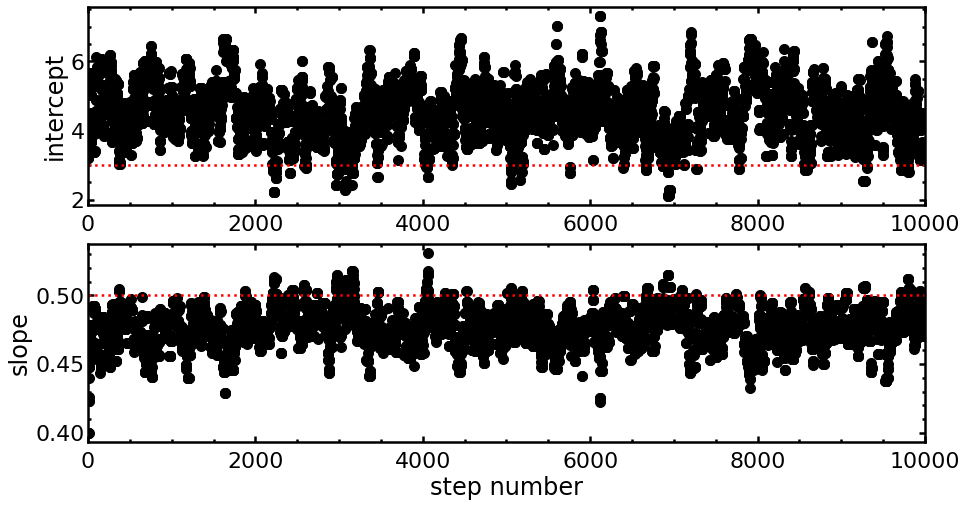

In [6]:
fig,ax = plt.subplots(2)
ax[0].scatter(range(number_of_steps),intercepts,color='k')
ax[0].hlines(3,-1,number_of_steps+1,color='r',linestyle=':')
ax[1].scatter(range(number_of_steps),slopes,color='k')
ax[1].hlines(0.5,-1,number_of_steps+1,color='r',linestyle=':')
ax[0].set_ylabel('intercept')
ax[0].set_xlim(0,number_of_steps)
ax[1].set_ylabel('slope')
ax[1].set_xlabel('step number')
ax[1].set_xlim(0,number_of_steps)
plt.show()

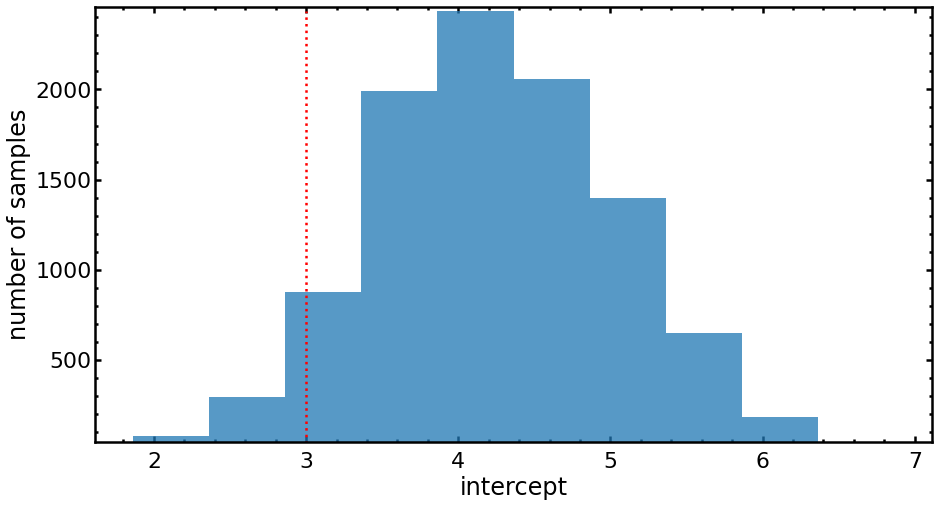

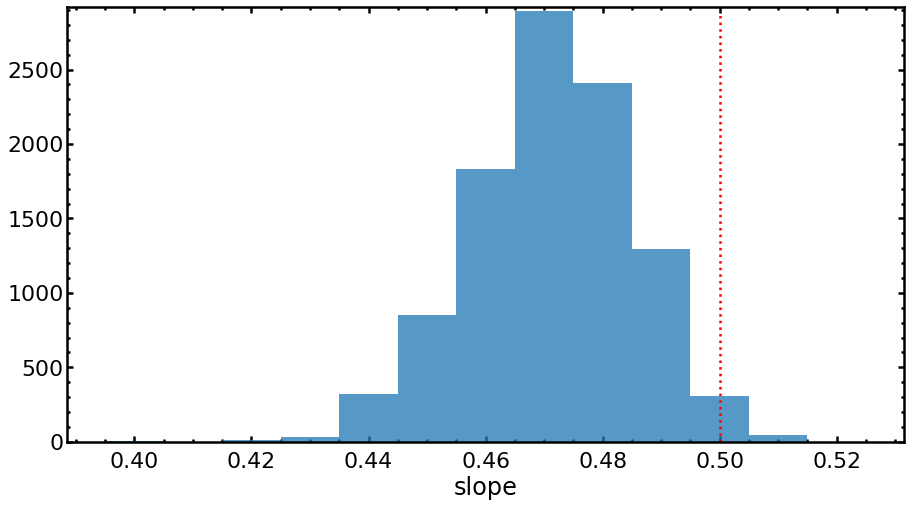

In [7]:
ibins = np.arange(min(intercepts),max(intercepts),0.5)
ihisty,ihistx,_ = plt.hist(intercepts,bins=ibins,alpha=0.75,align='left')
plt.vlines(intercept,-1,ihisty.max()+1,linestyles=':',color='r')
plt.ylim(ihisty.min(),ihisty.max()*1.01)
plt.xlabel('intercept')
plt.ylabel('number of samples')
plt.show()
sbins = np.arange(min(slopes),max(slopes),0.01)
shisty,shistx,_ = plt.hist(slopes,bins=sbins,alpha=0.75,align='left')
plt.vlines(slope,-1,shisty.max()+1,linestyles=':',color='r')
plt.ylim(shisty.min(),shisty.max()*1.01)
plt.xlabel('slope')
plt.show()

In [8]:
stop = stop

NameError: name 'stop' is not defined

In [ ]:
transit_file = '/storage/home/nxt5197/work/577_exoplanets/HW10/transits.txt'
test_file = '/storage/home/nxt5197/work/577_exoplanets/test.txt'
import os
if os.path.isfile(test_file):
    print(os.path.isfile(test_file))
    os.remove(test_file)
    print(os.path.isfile(test_file))

True
False


[2.0159587  2.11921265 2.2224666  2.32572056 2.42897451 2.53222847
 2.63548242 2.73873637 2.84199033 2.94524428 3.04849823 3.15175219
 3.25500614 3.3582601  3.46151405 3.564768   3.66802196 3.77127591
 3.87452986 3.97778382]


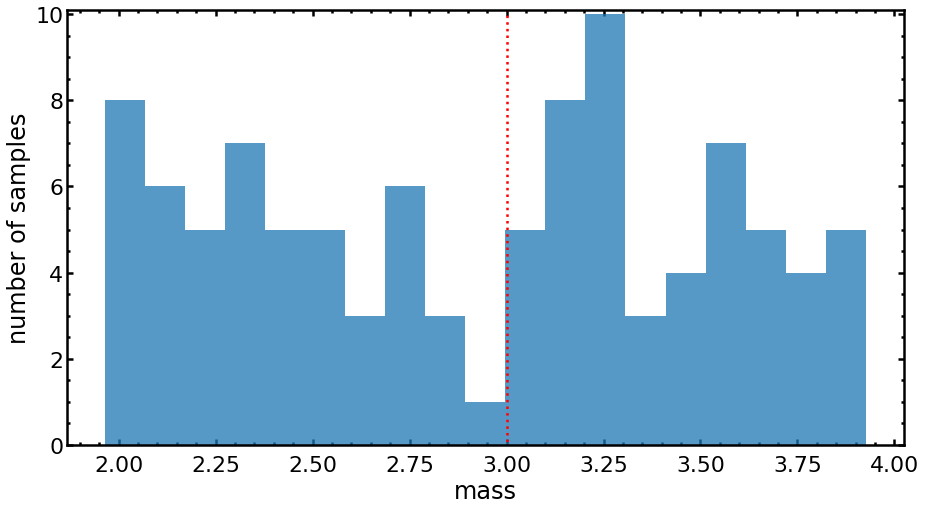

In [ ]:
masses = [rand.uniform(4.8672,4.8674) for i in range(100)]
spread = [(masses[i]-4.867)*10000 for i in range(100)]
# print(masses)
step_size = 0.00025
actual_mass=4.8673
bins = np.linspace(min(spread),max(spread),int(len(spread)/5))
print(bins)
histy,histx,_ = plt.hist(spread,bins=bins,alpha=0.75,align='left')
plt.vlines((actual_mass-4.867)*10000,-1,histy.max()*1.02,linestyles=':',color='r')
plt.ylim(0,histy.max()*1.01)
plt.xlabel('mass')
plt.ylabel('number of samples')
plt.savefig('HW10_histogram.png',format='png')
plt.show()

In [ ]:
def MCMC(z,s,number_of_steps,x,y_noisy):
    m = z[1]
    b = z[0]
    lnp0 = lnp(m,x,b,y_noisy)
    slopes=[]
    intercepts=[]

    for step in range(number_of_steps):
        i = rand.randint(0,1)
        jump = s[i]*rand.gauss(0,1)
        new_z = z[:]
        new_z[i] += jump
        m = new_z[1]
        b = new_z[0]
        lnp1 = lnp(m,x,b,y_noisy)
        prob = min(1,np.exp(lnp1-lnp0))
        if prob > rand.uniform(0,1):
            z = new_z[:]
        if i == 0:
            intercepts.append(z[0])
        if i == 1:
            slopes.append(z[1])
        lnp0 = lnp1
    return intercepts,slopes

/tmp/ipykernel_27486/945897653.py:16: RuntimeWarning: overflow encountered in exp
  prob = min(1,np.exp(lnp1-lnp0))


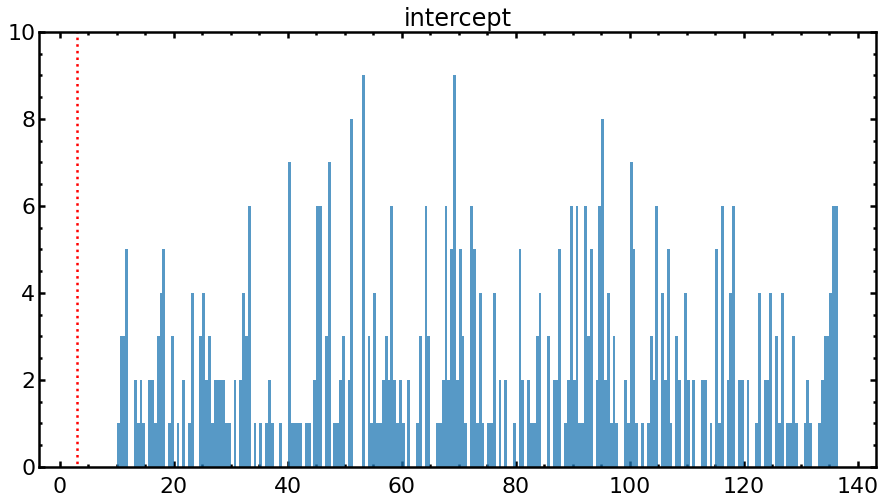

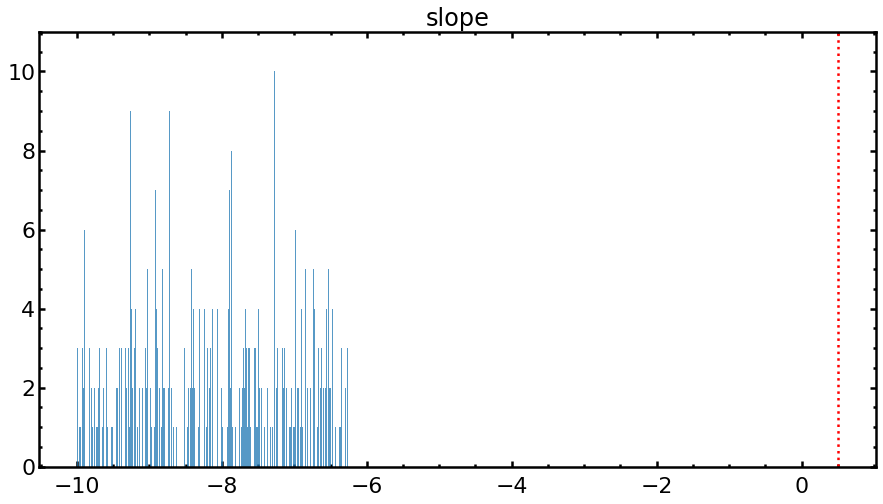

In [ ]:
number_of_steps = 1000
zs = [[0,0] for i in range(number_of_steps)]
z = [10,-10]
s = [0.7,0.02]

intercepts,slopes = MCMC(z,s,number_of_steps,x,y_noisy)

bins = np.arange(min(intercepts),max(intercepts),0.5)
histy,histx,_ = plt.hist(intercepts,bins=bins,alpha=0.75)
plt.vlines(intercept,-1,histy.max()+1,linestyles=':',color='r')
plt.ylim(histy.min(),histy.max()+1)
plt.title('intercept')
plt.show()
bins = np.arange(min(slopes),max(slopes),0.01)
histy,histx,_ = plt.hist(slopes,bins=bins,alpha=0.75)
plt.vlines(slope,-1,histy.max()+1,linestyles=':',color='r')
plt.ylim(histy.min(),histy.max()+1)
plt.title('slope')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('./accretion.mplstyle')
import numpy as np
from astropy import constants as const
from astropy import units as u
from collections import OrderedDict
from itertools import cycle
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
from scipy import interpolate
from scipy.stats import linregress as linfit
img = mpimg.imread('/storage/home/nxt5197/work/577_exoplanets/eye.png')

# Functions for integrator in 3D.

# def model(m,x,b):
#     y_model = m*x+b 
#     return y_model

def lnp(m,x,b,data):
    sigma2 = sigma**2
    n = len(data)
    return - sum((data-model(m,x,b))**2)/2/sigma2

def dvidt(M_j,r_ij,r_i,r_j):
    G = const.G.cgs
    dvdt=[0,0,0]
    dvdt[0] = -(G*M_j/r_ij**3*(r_i[0] - r_j[0])).to(u.cm/u.day**2)
    dvdt[1] = -(G*M_j/r_ij**3*(r_i[1] - r_j[1])).to(u.cm/u.day**2)
    dvdt[2] = -(G*M_j/r_ij**3*(r_i[2] - r_j[2])).to(u.cm/u.day**2)
    return dvdt

def rmag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    z_i=r_i[2]
    x_j=r_j[0]
    y_j=r_j[1]
    z_j=r_j[2]
    r_ij = np.sqrt((x_i-x_j)**2+(y_i-y_j)**2+(z_i-z_j)**2)
    return r_ij

def r_s_mag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    z_i=r_i[2]
    x_j=r_j[0]
    y_j=r_j[1]
    z_j=r_j[2]
    r_ij = np.sqrt((x_i-x_j)**2+(z_i-z_j)**2)
    return r_ij

def get_r_final(r,v,dt):
    x,y,z = r+v*dt
    return x,y,z


def model(m_venus):

    b = OrderedDict((("Sun",0),("Venus",1),("Earth",2)))

    G = const.G.cgs
    m_sun = const.M_sun.to(u.g)
    m_v = m_venus*u.g # (4.8673*10**27)*u.g
    m_e = const.M_earth.to(u.g)
    m = OrderedDict(((0,m_sun),(1,m_v),(2,m_e)))

    a_v = 0.723*const.au.to(u.cm)
    a_e = const.au.to(u.cm)
    a = OrderedDict(((1,a_v),(2,a_e)))
    a_sun = -sum([m[i]*a[i] for i in a])/m_sun
    a = OrderedDict(((0,a_sun),(1,a_v),(2,a_e)))

    v_sun = -(0.13*u.m/u.s).to(u.cm/u.day)
    v_v = 1.18*(29.78*u.km/u.s).to(u.cm/u.day)
    v_e = (29.78*u.km/u.s).to(u.cm/u.day)
    vstart = OrderedDict(((0,v_sun),(1,v_v),(2,v_e)))

    # colors = OrderedDict(((0,'white'),(1,'yellow'),(2,'blue')))
    period = OrderedDict(((0,0),(1,0.615),(2,1)))

    # Set timesteps and number of orbits here

    delta_t = 1*u.day

    orbits = 5

    t_range = np.arange(0,orbits*365,delta_t.value)*u.day      # 1 year timescale in steps of delta_t

    # Initialize empty position, velocity, and acceleration arrays
    Dimensions=2
    r = [[[0,0,0]*u.cm for i in range(len(t_range))] for i in range(len(b))]
    x = [[0]*len(t_range) for i in range(len(b))]
    y = [[0]*len(t_range) for i in range(len(b))]
    z = [[0]*len(t_range) for i in range(len(b))]
    v = [[[0,0,0]*u.cm/u.day for i in range(len(t_range))] for i in range(len(b))]
    dvdt = [[[0,0,0]*u.cm/u.day**2 for i in range(len(t_range))] for i in range(len(b))]

    # Set initial position for each body
    for i,bdy in enumerate(b):
        r[i][0][0] = a[i]
        r[i][0][1] = 0*u.cm
        r[i][0][2] = 0*u.cm
        x[i][0] = r[i][0][0]
        y[i][0] = r[i][0][1]
        z[i][0] = r[i][0][2]
        v[i][0][0] = 0*u.cm/u.day
        v[i][0][1] = vstart[i]
        v[i][0][2] = 0*u.cm/u.day

    # Integrate over all timesteps to get orbital parameters for each body

    steps=len(t_range) # The number of steps in the time array
        
    for t in range(steps-1): # indexing each timestep as t
        # Update the next position for each body
        for i, body in enumerate(b):
            r[i][t+1][0], r[i][t+1][1], r[i][t+1][2] = get_r_final(r[i][t],v[i][t],delta_t)
            x[i][t+1], y[i][t+1], z[i][t+1] = get_r_final(r[i][t],v[i][t],delta_t)

        # Update the next velocity for each body
        for i, body in enumerate(b):
            # Sum effects of all bodies j on each body i in the system
            for j, body in enumerate(b):
                if i==j:
                    continue
                r_ij = rmag(r[i][t+1],r[j][t+1])
                dvdt[i][t][0] += dvidt(m[j],r_ij,r[i][t+1],r[j][t+1])[0]
                dvdt[i][t][1] += dvidt(m[j],r_ij,r[i][t+1],r[j][t+1])[1]
                dvdt[i][t][2] += dvidt(m[j],r_ij,r[i][t+1],r[j][t+1])[2]

            v[i][t+1][0] = v[i][t][0] + dvdt[i][t][0] * delta_t
            v[i][t+1][1] = v[i][t][1] + dvdt[i][t][1] * delta_t
            v[i][t+1][2] = v[i][t][2] + dvdt[i][t][2] * delta_t 

    # Set global functions based on calculated orbital parameter arrays
    xfunc=[0 for i in b]
    yfunc=[0 for i in b]
    zfunc=[0 for i in b]
    vfunc=[[0,0,0] for i in b]
    afunc=[[0,0,0] for i in b]
    for i,body in enumerate(b):
        xfunc[i] = interpolate.interp1d([t.value for t in t_range],[k.value for k in x[i]])
        yfunc[i] = interpolate.interp1d([t.value for t in t_range],[k.value for k in y[i]])
        zfunc[i] = interpolate.interp1d([t.value for t in t_range],[k.value for k in z[i]])
        for D in range(Dimensions):
            vfunc[i][D] = interpolate.interp1d([t.value for t in t_range],[k[D].value for k in v[i]])
            afunc[i][D] = interpolate.interp1d([t.value for t in t_range],[k[D].value for k in dvdt[i]])

    # FUNCTIONS BELOW ARE TEMPORARILY IN 2D ONLY
    def g(transitting_body,t):
        i = transitting_body
        return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

    def dgdt(transitting_body,t):
        i = transitting_body
        return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

    def get_approx_transits(transitting_body,t_array,num_orbits):
        i = transitting_body
        trange=[int(t.value) for t in t_array]
        approx_transits = [0 for k in range(num_orbits)]
        orbit=0
        for t in trange:
            if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
                if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                    approx_transits[orbit] = t
                    orbit+=1
        return approx_transits

    def pinpoint_transits(transitting_body,approx_transits):
        count=0
        while max(g(transitting_body,approx_transits)) > 10**-15:
            g_array = g(transitting_body,approx_transits)
            dgdt_array = dgdt(transitting_body,approx_transits)
            approx_transits += - g_array / dgdt_array
            count += 1
            if count == 10:
                print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
                break
        return approx_transits

    num_orbits_earth=int(orbits/period[2])
    approx_transits_earth=get_approx_transits(2,t_range,num_orbits_earth)
    real_transits_earth=pinpoint_transits(2,approx_transits_earth)
    return real_transits_earth

In [61]:
import matplotlib.pyplot as plt
plt.style.use('./accretion.mplstyle')
import numpy as np
from astropy import constants as const
from astropy import units as u
from collections import OrderedDict
from itertools import cycle
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
from scipy import interpolate
from scipy.stats import linregress as linfit
img = mpimg.imread('/storage/home/nxt5197/work/577_exoplanets/eye.png')

# Functions for integrator

def dvidt(M_j,r_ij,r_i,r_j):
    G = const.G.cgs.to(u.cm**3/u.g/u.day**2).value
    dvdt=[0,0,0]
    dvdt[0] = -(G*M_j/r_ij**3*(r_i[0] - r_j[0]))
    dvdt[1] = -(G*M_j/r_ij**3*(r_i[1] - r_j[1]))
    dvdt[2] = -(G*M_j/r_ij**3*(r_i[2] - r_j[2]))
    return dvdt

def rmag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    z_i=r_i[2]
    x_j=r_j[0]
    y_j=r_j[1]
    z_j=r_j[2]
    r_ij = np.sqrt((x_i-x_j)**2+(y_i-y_j)**2+(z_i-z_j)**2)
    return r_ij

def r_s_mag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    z_i=r_i[2]
    x_j=r_j[0]
    y_j=r_j[1]
    z_j=r_j[2]
    r_ij = np.sqrt((x_i-x_j)**2+(z_i-z_j)**2)
    return r_ij

def get_r_final(r,v,dt):
    x,y,z = np.add(r,v*dt)
    return x,y,z

def model(m_venus):

    b = OrderedDict((("Sun",0),("Venus",1),("Earth",2)))

    G = const.G.cgs
    m_sun = const.M_sun.to(u.g)
    m_v = m_venus*u.g # (4.8673*10**27)*u.g
    m_e = const.M_earth.to(u.g)
    m = OrderedDict(((0,m_sun.value),(1,m_v.value),(2,m_e.value)))

    a_v = 0.723*const.au.to(u.cm)
    a_e = const.au.to(u.cm)
    a = OrderedDict(((1,a_v.value),(2,a_e.value)))
    a_sun = -sum([m[i]*a[i] for i in a])/m_sun.value
    a = OrderedDict(((0,a_sun),(1,a_v.value),(2,a_e.value)))

    v_sun = -(0.13*u.m/u.s).to(u.cm/u.day)
    v_v = 1.18*(29.78*u.km/u.s).to(u.cm/u.day)
    v_e = (29.78*u.km/u.s).to(u.cm/u.day)
    vstart = OrderedDict(((0,v_sun.value),(1,v_v.value),(2,v_e.value)))

    # colors = OrderedDict(((0,'white'),(1,'yellow'),(2,'blue')))
    period = OrderedDict(((0,0),(1,0.615),(2,1)))

    # Set timesteps and number of orbits here

    delta_t = 1 # in days

    orbits = 10

    t_range = np.arange(0,orbits*365,delta_t)      # 1 year timescale in steps of delta_t

    # Initialize empty position, velocity, and acceleration arrays
    Dimensions=2
    r = [[[0,0,0] for i in range(len(t_range))] for i in range(len(b))]
    x = [[0]*len(t_range) for i in range(len(b))]
    y = [[0]*len(t_range) for i in range(len(b))]
    z = [[0]*len(t_range) for i in range(len(b))]
    v = [[[0,0,0] for i in range(len(t_range))] for i in range(len(b))]
    dvdt = [[[0,0,0] for i in range(len(t_range))] for i in range(len(b))]

    # Set initial position for each body
    for i,bdy in enumerate(b):
        r[i][0][0] = a[i]
        r[i][0][1] = 0
        r[i][0][2] = 0
        x[i][0] = r[i][0][0]
        y[i][0] = r[i][0][1]
        z[i][0] = r[i][0][2]
        v[i][0][0] = 0
        v[i][0][1] = vstart[i]
        v[i][0][2] = 0

    # Integrate over all timesteps to get orbital parameters for each body

    steps=len(t_range) # The number of steps in the time array
        
    for t in range(steps-1): # indexing each timestep as t
        # Update the next position for each body
        for i, body in enumerate(b):
            r[i][t+1][0], r[i][t+1][1], r[i][t+1][2] = get_r_final(r[i][t],v[i][t],delta_t)
            x[i][t+1], y[i][t+1], z[i][t+1] = get_r_final(r[i][t],v[i][t],delta_t)

        # r_ij
        r_01 = rmag(r[0][t+1],r[1][t+1])
        r_02 = rmag(r[0][t+1],r[2][t+1])
        r_10 = rmag(r[1][t+1],r[0][t+1])
        r_12 = rmag(r[1][t+1],r[2][t+1])
        r_20 = rmag(r[2][t+1],r[0][t+1])
        r_21 = rmag(r[2][t+1],r[1][t+1])

        # dvdt
        dvdt[0][t] = np.add(dvidt(m[1],r_01,r[0][t+1],r[1][t+1]), dvidt(m[2],r_02,r[0][t+1],r[2][t+1]))
        dvdt[1][t] = np.add(dvidt(m[0],r_10,r[1][t+1],r[0][t+1]), dvidt(m[2],r_12,r[1][t+1],r[2][t+1]))
        dvdt[2][t] = np.add(dvidt(m[0],r_20,r[2][t+1],r[0][t+1]), dvidt(m[1],r_21,r[2][t+1],r[1][t+1]))

        # v
        v[0][t+1] = np.add(v[0][t], dvdt[0][t] * delta_t)
        v[1][t+1] = np.add(v[1][t], dvdt[1][t] * delta_t)
        v[2][t+1] = np.add(v[2][t], dvdt[2][t] * delta_t)

    # Set global functions based on calculated orbital parameter arrays
    xfunc=[0 for i in b]
    yfunc=[0 for i in b]
    zfunc=[0 for i in b]
    vfunc=[[0,0,0] for i in b]
    afunc=[[0,0,0] for i in b]
    for i,body in enumerate(b):
        xfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in x[i]])
        yfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in y[i]])
        zfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in z[i]])
        for D in range(Dimensions):
            vfunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in v[i]])
            afunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in dvdt[i]])

    # FUNCTIONS BELOW ARE TEMPORARILY IN 2D ONLY
    def g(transitting_body,t):
        i = transitting_body
        return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

    def dgdt(transitting_body,t):
        i = transitting_body
        return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

    def get_approx_transits(transitting_body,t_array,num_orbits):
        i = transitting_body
        trange=[int(t) for t in t_array]
        approx_transits = [0 for k in range(num_orbits)]
        orbit=0
        for t in trange:
            if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
                if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                    approx_transits[orbit] = t
                    orbit+=1
        return approx_transits

    def pinpoint_transits(transitting_body,approx_transits):
        count=0
        while max(g(transitting_body,approx_transits)) > 10**-15:
            g_array = g(transitting_body,approx_transits)
            dgdt_array = dgdt(transitting_body,approx_transits)
            approx_transits += - g_array / dgdt_array
            count += 1
            if count == 10:
                print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
                break
        return approx_transits

    num_orbits_earth=int(orbits/period[2])
    approx_transits_earth=get_approx_transits(2,t_range,num_orbits_earth)
    real_transits_earth=pinpoint_transits(2,approx_transits_earth)
    return real_transits_earth

In [58]:
# Integrate over all timesteps to get orbital parameters for each body

steps=len(t_range) # The number of steps in the time array
    
for t in range(steps-1): # indexing each timestep as t
    # Update the next position for each body
    for i, body in enumerate(b):
        r[i][t+1][0], r[i][t+1][1], r[i][t+1][2] = get_r_final(r[i][t],v[i][t],delta_t)
        x[i][t+1], y[i][t+1], z[i][t+1] = get_r_final(r[i][t],v[i][t],delta_t)

    # r_ij
    r_01 = rmag(r[0][t+1],r[1][t+1])
    r_02 = rmag(r[0][t+1],r[2][t+1])
    r_10 = rmag(r[1][t+1],r[0][t+1])
    r_12 = rmag(r[1][t+1],r[2][t+1])
    r_20 = rmag(r[2][t+1],r[0][t+1])
    r_21 = rmag(r[2][t+1],r[1][t+1])

    # dvdt
    dvdt[0][t] = np.add(dvidt(m[1],r_01,r[0][t+1],r[1][t+1]), dvidt(m[2],r_02,r[0][t+1],r[2][t+1]))
    dvdt[1][t] = np.add(dvidt(m[0],r_10,r[1][t+1],r[0][t+1]), dvidt(m[2],r_12,r[1][t+1],r[2][t+1]))
    dvdt[2][t] = np.add(dvidt(m[0],r_20,r[2][t+1],r[0][t+1]), dvidt(m[1],r_21,r[2][t+1],r[1][t+1]))

    # v
    v[0][t+1] = np.add(v[0][t], dvdt[0][t] * delta_t)
    v[1][t+1] = np.add(v[1][t], dvdt[1][t] * delta_t)
    v[2][t+1] = np.add(v[2][t], dvdt[2][t] * delta_t)

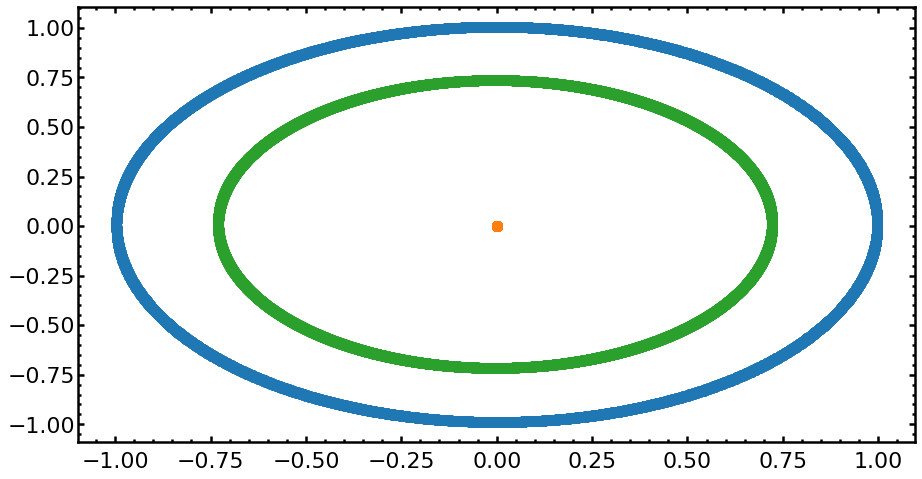

In [59]:
plt.scatter([i/1.5e13 for i in x[2]],[i/1.5e13 for i in y[2]])
plt.scatter([i/1.5e13 for i in x[0]],[i/1.5e13 for i in y[0]])
plt.scatter([i/1.5e13 for i in x[1]],[i/1.5e13 for i in y[1]])
plt.show()

In [60]:
# Set global functions based on calculated orbital parameter arrays
xfunc=[0 for i in b]
yfunc=[0 for i in b]
zfunc=[0 for i in b]
vfunc=[[0,0,0] for i in b]
afunc=[[0,0,0] for i in b]
for i,body in enumerate(b):
    xfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in x[i]])
    yfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in y[i]])
    zfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in z[i]])
    for D in range(Dimensions):
        vfunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in v[i]])
        afunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in dvdt[i]])

# FUNCTIONS BELOW ARE TEMPORARILY IN 2D ONLY
def g(transitting_body,t):
    i = transitting_body
    return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

def dgdt(transitting_body,t):
    i = transitting_body
    return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

def get_approx_transits(transitting_body,t_array,num_orbits):
    i = transitting_body
    trange=[int(t) for t in t_array]
    approx_transits = [0 for k in range(num_orbits)]
    orbit=0
    for t in trange:
        if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
            if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                approx_transits[orbit] = t
                orbit+=1
    return approx_transits

def pinpoint_transits(transitting_body,approx_transits):
    count=0
    while max(g(transitting_body,approx_transits)) > 10**-15:
        g_array = g(transitting_body,approx_transits)
        dgdt_array = dgdt(transitting_body,approx_transits)
        approx_transits += - g_array / dgdt_array
        count += 1
        if count == 10:
            print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
            break
    return approx_transits

num_orbits_earth=int(orbits/period[2])
approx_transits_earth=get_approx_transits(2,t_range,num_orbits_earth)
real_transits_earth=pinpoint_transits(2,approx_transits_earth)
real_transits_earth

array([   92.31720175,   457.4863772 ,   822.64962469,  1187.81961386,
        1552.99070328,  1918.15638516,  2283.32524857,  2648.4902096 ,
        3013.66046216,  3378.83121229,  3743.99521251,  4109.16405281,
        4474.3313699 ,  4839.50097993,  5204.6711095 ,  5569.83409851,
        5935.00323057,  6300.17279013,  6665.34117376,  7030.51044363,
        7395.67346645,  7760.8431712 ,  8126.01405496,  8491.18061587,
        8856.34960689,  9221.51354456,  9586.68386942,  9951.85484081,
       10317.01957911, 10682.18842125, 11047.35458056, 11412.52458924,
       11777.69501069, 12142.8583922 , 12508.02738778, 12873.19592643,
       13238.3650328 , 13603.53458139, 13968.69748968, 14333.8669381 ,
       14699.03731102, 15064.20474563, 15429.37390736, 15794.53720896,
       16159.70730725, 16524.87834836, 16890.04390771, 17255.21280555,
       17620.37790655, 17985.54810631])

In [ ]:
actual_mass = 4.8673e27
data = model(actual_mass)
print(data)
sigma = 1
error = np.random.normal(0,sigma)
y_noisy = np.array([data[i] + np.random.normal(0,sigma) for i in range(len(data))])
print(y_noisy)

[  92.31720175  457.4863772   822.64962469 1187.81961386 1552.99070328]
[  95.49463096  457.04507853  822.1794296  1187.04419022 1552.86009799]



True values for y = mx + b
slope (m)	intercept (b)
  0.50		  3.00

Initial guess for y = mx + b
slope (m)	intercept (b)
  0.40		  2.90

Acceptance Fractions	39.80%


[0.4,
 0.40271539923806576,
 0.40271539923806576,
 0.41555834191618707,
 0.41555834191618707,
 0.4158472092274071,
 0.4357045838066298,
 0.43628234444031816,
 0.43628234444031816,
 0.43627478266443354,
 0.4513995967897078,
 0.4618537238087193,
 0.4848958053212243,
 0.4848958053212243,
 0.4848958053212243,
 0.49155992106949,
 0.49155992106949,
 0.48778775015275877,
 0.48752738225679865,
 0.5026893462337809,
 0.507201373222066,
 0.5017538350363889,
 0.502732730562401,
 0.502732730562401,
 0.5146905407300613,
 0.5049493318361385,
 0.5049493318361385,
 0.5049493318361385,
 0.5049493318361385,
 0.5057079375037234,
 0.5025131334002767,
 0.5025131334002767,
 0.5076116313163261,
 0.5114384045837981,
 0.5114384045837981,
 0.5159228237226853,
 0.5086444168433685,
 0.5076111834528071,
 0.5286106720987137,
 0.5169527306728331,
 0.5146871760494448,
 0.5146871760494448,
 0.5146871760494448,
 0.5146871760494448,
 0.505914465205555,
 0.505914465205555,
 0.505914465205555,
 0.5092898810293567,
 0.50714

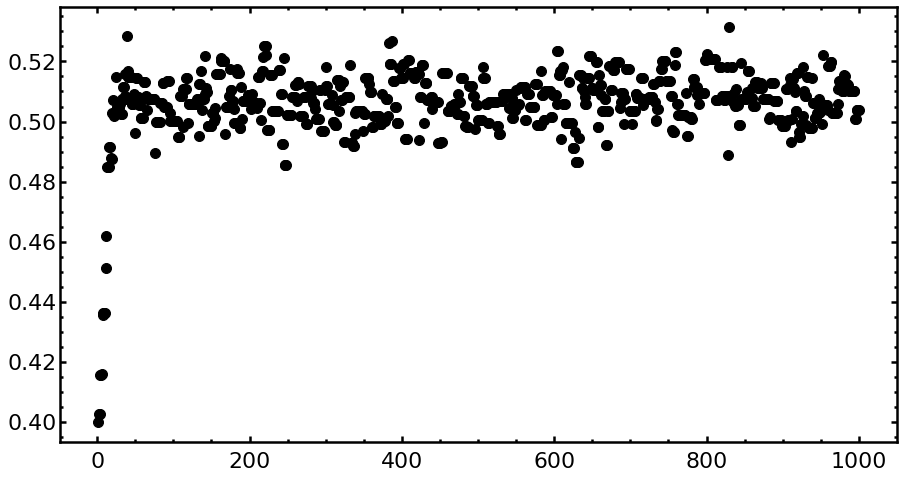

In [ ]:
x = np.arange(1,100,2)
slope = 0.5
intercept = 3
y = x*slope+intercept
sigma = 3
error = np.random.normal(0,sigma)
y_noisy = np.array([y[i] + np.random.normal(0,sigma) for i in range(len(y))])

def model(m,x,b):
    y_model = m*x+b 
    return y_model

def lnp(m,x,b,data):
    sigma2 = sigma**2
    n = len(data)
    return - sum((data-model(m,x,b))**2)/2/sigma2

print(f'\nTrue values for y = mx + b\nslope (m)\tintercept (b)\n  {slope:.2f}\t\t  {intercept:.2f}')

intercept_guess = 2.9
slope_guess = 0.4
z = slope_guess
intercept_step_size = 0.7
slope_step_size = 0.02
s = slope_step_size
print(f'\nInitial guess for y = mx + b\nslope (m)\tintercept (b)\n  {z:.2f}\t\t  {b:.2f}')
number_of_steps=1000

zs = [[0,0] for i in range(number_of_steps)]

m = z
b = intercept_guess
lnp0 = lnp(m,x,b,y_noisy)

accepted=0
count=0
fig,ax = plt.subplots(1)
for step in range(number_of_steps):
    jump = s*np.random.normal(0,1)
    new_z = z+jump
    m = new_z
    lnp1 = lnp(m,x,b,y_noisy)
    prob = min(1,np.exp(lnp1-lnp0))
    if prob > rand.uniform(0,1):
        z = new_z
        accepted+=1
        lnp0 = lnp1
    count+=1
    zs[step] = z
    ax.scatter(count,z,color='k')
print(f'\nAcceptance Fractions\t{accepted/count*100:.2f}%')

# zs

In [12]:
import matplotlib.pyplot as plt
plt.style.use('./accretion.mplstyle')
import numpy as np
import random as rand
from astropy import constants as const
from astropy import units as u
from collections import OrderedDict
from scipy import interpolate
import time

In [13]:
orbits = 5
delta_t = 1*u.day
t_array = np.arange(0,orbits*365,delta_t.value)*u.day
trange=[int(t.value) for t in t_array]

In [65]:
def get_elapsed_time(start=0):
    end = time.time() - start
    time_label = 'seconds'    
    if end > 3600:
        end = end/3600
        time_label = 'hours'
    elif end > 60:
        end = end/60
        time_label = 'minutes'
    return end, time_label

# Functions for integrator in 3D.

def dvidt(M_j,r_ij,r_i,r_j):
    G = const.G.cgs
    dvdt=[0,0,0]
    dvdt[0] = -(G*M_j/r_ij**3*(r_i[0] - r_j[0])).to(u.cm/u.day**2)
    dvdt[1] = -(G*M_j/r_ij**3*(r_i[1] - r_j[1])).to(u.cm/u.day**2)
    dvdt[2] = -(G*M_j/r_ij**3*(r_i[2] - r_j[2])).to(u.cm/u.day**2)
    return dvdt

def rmag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    z_i=r_i[2]
    x_j=r_j[0]
    y_j=r_j[1]
    z_j=r_j[2]
    r_ij = np.sqrt((x_i-x_j)**2+(y_i-y_j)**2+(z_i-z_j)**2)
    return r_ij

def r_s_mag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    z_i=r_i[2]
    x_j=r_j[0]
    y_j=r_j[1]
    z_j=r_j[2]
    r_ij = np.sqrt((x_i-x_j)**2+(z_i-z_j)**2)
    return r_ij

def get_r_final(r,v,dt):
    x,y,z = r+v*dt
    return x,y,z


def ttv_model(m_venus):

    b = OrderedDict((("Sun",0),("Venus",1),("Earth",2)))

    G = const.G.cgs
    m_sun = const.M_sun.to(u.g)
    m_v = m_venus*1e27*u.g # (4.8673*10**27)*u.g
    m_e = const.M_earth.to(u.g)
    m = OrderedDict(((0,m_sun),(1,m_v),(2,m_e)))

    a_v = 0.723*const.au.to(u.cm)
    a_e = const.au.to(u.cm)
    a = OrderedDict(((1,a_v),(2,a_e)))
    a_sun = -sum([m[i]*a[i] for i in a])/m_sun
    a = OrderedDict(((0,a_sun),(1,a_v),(2,a_e)))

    v_sun = -(0.13*u.m/u.s).to(u.cm/u.day)
    v_v = 1.18*(29.78*u.km/u.s).to(u.cm/u.day)
    v_e = (29.78*u.km/u.s).to(u.cm/u.day)
    vstart = OrderedDict(((0,v_sun),(1,v_v),(2,v_e)))

    # colors = OrderedDict(((0,'white'),(1,'yellow'),(2,'blue')))
    period = OrderedDict(((0,0),(1,0.615),(2,1)))

    # Set timesteps and number of orbits here

    delta_t = 7*u.day

    orbits = 10

    t_range = np.arange(0,orbits*365,delta_t.value)*u.day      # 1 year timescale in steps of delta_t

    # Initialize empty position, velocity, and acceleration arrays
    Dimensions=2
    r = [[[0,0,0]*u.cm for i in range(len(t_range))] for i in range(len(b))]
    x = [[0]*len(t_range) for i in range(len(b))]
    y = [[0]*len(t_range) for i in range(len(b))]
    z = [[0]*len(t_range) for i in range(len(b))]
    v = [[[0,0,0]*u.cm/u.day for i in range(len(t_range))] for i in range(len(b))]
    dvdt = [[[0,0,0]*u.cm/u.day**2 for i in range(len(t_range))] for i in range(len(b))]

    # Set initial position for each body
    for i,bdy in enumerate(b):
        r[i][0][0] = a[i]
        r[i][0][1] = 0*u.cm
        r[i][0][2] = 0*u.cm
        x[i][0] = r[i][0][0]
        y[i][0] = r[i][0][1]
        z[i][0] = r[i][0][2]
        v[i][0][0] = 0*u.cm/u.day
        v[i][0][1] = vstart[i]
        v[i][0][2] = 0*u.cm/u.day

    # Integrate over all timesteps to get orbital parameters for each body

    steps=len(t_range) # The number of steps in the time array
        
    for t in range(steps-1): # indexing each timestep as t
        # Update the next position for each body
        for i, body in enumerate(b):
            r[i][t+1][0], r[i][t+1][1], r[i][t+1][2] = get_r_final(r[i][t],v[i][t],delta_t)
            x[i][t+1], y[i][t+1], z[i][t+1] = get_r_final(r[i][t],v[i][t],delta_t)

        # Update the next velocity for each body
        for i, body in enumerate(b):
            # Sum effects of all bodies j on each body i in the system
            for j, body in enumerate(b):
                if i==j:
                    continue
                r_ij = rmag(r[i][t+1],r[j][t+1])
                dvdt[i][t][0] += dvidt(m[j],r_ij,r[i][t+1],r[j][t+1])[0]
                dvdt[i][t][1] += dvidt(m[j],r_ij,r[i][t+1],r[j][t+1])[1]
                dvdt[i][t][2] += dvidt(m[j],r_ij,r[i][t+1],r[j][t+1])[2]

            v[i][t+1][0] = v[i][t][0] + dvdt[i][t][0] * delta_t
            v[i][t+1][1] = v[i][t][1] + dvdt[i][t][1] * delta_t
            v[i][t+1][2] = v[i][t][2] + dvdt[i][t][2] * delta_t 

    # Set global functions based on calculated orbital parameter arrays
    xfunc=[0 for i in b]
    yfunc=[0 for i in b]
    zfunc=[0 for i in b]
    vfunc=[[0,0,0] for i in b]
    afunc=[[0,0,0] for i in b]
    for i,body in enumerate(b):
        xfunc[i] = interpolate.interp1d([t.value for t in t_range],[k.value for k in x[i]])
        yfunc[i] = interpolate.interp1d([t.value for t in t_range],[k.value for k in y[i]])
        zfunc[i] = interpolate.interp1d([t.value for t in t_range],[k.value for k in z[i]])
        for D in range(Dimensions):
            vfunc[i][D] = interpolate.interp1d([t.value for t in t_range],[k[D].value for k in v[i]])
            afunc[i][D] = interpolate.interp1d([t.value for t in t_range],[k[D].value for k in dvdt[i]])

    # FUNCTIONS BELOW ARE TEMPORARILY IN 2D ONLY
    # These need to be inside loop, after defining xfunc from transits
    def g(transitting_body,t):
        i = transitting_body
        return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

    def dgdt(transitting_body,t):
        i = transitting_body
        return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

    def get_approx_transits(transitting_body,t_array,num_orbits):
        i = transitting_body
        trange=list(np.arange(0,t_array[-1].value,1).astype(int))
        approx_transits = [0 for k in range(num_orbits)]
        orbit=0
        for t in trange:
            if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
                if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                    approx_transits[orbit] = t
                    orbit+=1
        return approx_transits

    def pinpoint_transits(transitting_body,approx_transits):
        count=0
        while max(g(transitting_body,approx_transits)) > 10**-15:
            g_array = g(transitting_body,approx_transits)
            dgdt_array = dgdt(transitting_body,approx_transits)
            approx_transits += - g_array / dgdt_array
            count += 1
            if count == 10:
                print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
                print(f'approx_transits: {approx_transits}. Precision: {max(g(transitting_body,approx_transits))}')
                break
        return approx_transits

    num_orbits_earth=int(orbits/period[2])
    approx_transits_earth=get_approx_transits(2,t_range,num_orbits_earth)
    real_transits_earth=pinpoint_transits(2,approx_transits_earth)
    return real_transits_earth#, xfunc, yfunc,vfunc, afunc

In [57]:
actual_mass = 4.8673 # e27
ttvs,xfunc,yfunc,vfunc, afunc = ttv_model(actual_mass)
i = 2
orbits=3
delta_t=10*u.day
t_range = np.arange(0,orbits*365,delta_t.value)*u.day
t_array = t_range
trange=list(np.arange(0,t_array[-1].value,1).astype(int))

In [30]:
print(trange[:10])
xfunc[2](trange[40:50])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array([1.25415492e+13, 1.23924147e+13, 1.22432801e+13, 1.20941455e+13,
       1.19450109e+13, 1.17958763e+13, 1.16467417e+13, 1.14976072e+13,
       1.13484726e+13, 1.11993380e+13])

In [58]:
def g(transitting_body,t):
    i = transitting_body
    return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

def dgdt(transitting_body,t):
    i = transitting_body
    return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

def get_approx_transits(transitting_body,t_array,num_orbits):
    i = transitting_body
    trange=list(np.arange(0,t_array[-1].value,1).astype(int))
    approx_transits = [0 for k in range(num_orbits)]
    orbit=0
    for t in trange:
        if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
            if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                approx_transits[orbit] = t
                orbit+=1
    return approx_transits

def pinpoint_transits(transitting_body,approx_transits):
    count=0
    while max(g(transitting_body,approx_transits)) > 10**-15:
        # print(f'g: {g(transitting_body,approx_transits)}')
        print(f'Precision: {max(g(transitting_body,approx_transits))}')
        g_array = g(transitting_body,approx_transits)
        dgdt_array = dgdt(transitting_body,approx_transits)
        approx_transits += - g_array / dgdt_array
        # print(f'TTVs: {approx_transits}')
        count += 1
        if count == 10:
            print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
            print(f'approx_transits: {approx_transits}. Precision: {max(g(transitting_body,approx_transits))}')
            break
    return approx_transits

transitting_body=2
approx_transits=ttvs
pinpoint_transits(2,get_approx_transits(2,t_range,num_orbits=orbits))

Precision: 9.201466248453167e+21


array([ 98.84141346, 467.85826946, 836.87128948])

In [ ]:
list(np.arange(0,t_array[-1].value,1).astype(int))[:5]

[0, 1, 2, 3, 4]

In [ ]:
ttv_model(actual_mass)

You fucked up. Count: 50.
Breaking While Loop Manually.
approx_transits: [ 102.4169014   475.68965995  848.95984163 1222.24695264 1595.51863526]. Precision: 4409292467.824185


array([ 102.4169014 ,  475.68965995,  848.95984163, 1222.24695264,
       1595.51863526])

In [ ]:
stop = stop

In [67]:
for trial in range(2):
    print(trial)

0
1


np.exp(lnp1-lnp0): 0.5161611991950688

1 of 10 for loops completed in 41.07 seconds. Current acceptance fraction:	100.00%
np.exp(lnp1-lnp0): 0.3807379276296318

2 of 10 for loops completed in 55.89 seconds. Current acceptance fraction:	50.00%
np.exp(lnp1-lnp0): 8.751286153494724e-05

3 of 10 for loops completed in 1.18 minutes. Current acceptance fraction:	33.33%
np.exp(lnp1-lnp0): 0.452838027558637

4 of 10 for loops completed in 1.42 minutes. Current acceptance fraction:	50.00%
np.exp(lnp1-lnp0): 0.0320270220354103

5 of 10 for loops completed in 1.66 minutes. Current acceptance fraction:	40.00%
np.exp(lnp1-lnp0): 3.2011342147235387

6 of 10 for loops completed in 1.88 minutes. Current acceptance fraction:	50.00%
np.exp(lnp1-lnp0): 0.04823875208796175

7 of 10 for loops completed in 2.10 minutes. Current acceptance fraction:	42.86%
np.exp(lnp1-lnp0): 0.6356892065293878

8 of 10 for loops completed in 2.32 minutes. Current acceptance fraction:	50.00%
np.exp(lnp1-lnp0): 0.0001261056320

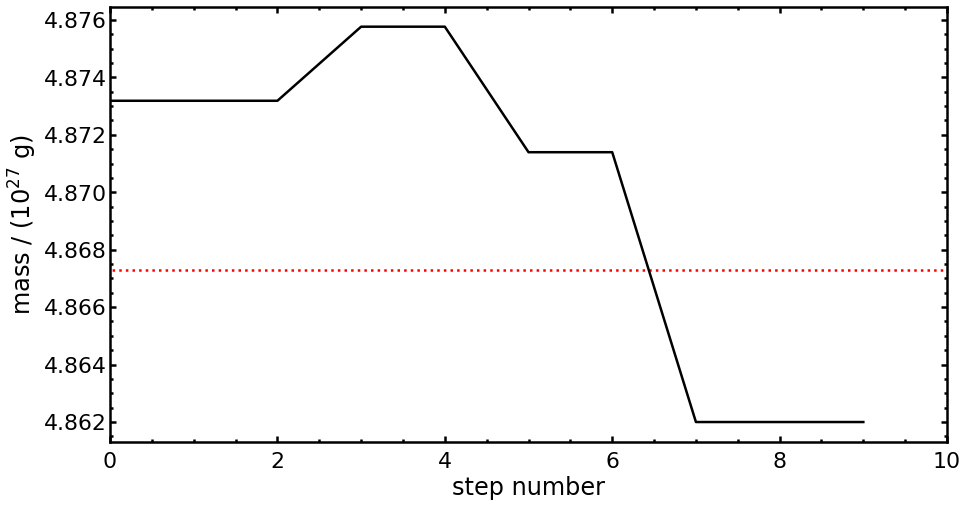


Masses: [4.87318448 4.87318448 4.87318448 4.87576375 4.87576375 4.8713935
 4.8713935  4.8619992  4.8619992  4.8619992 ]



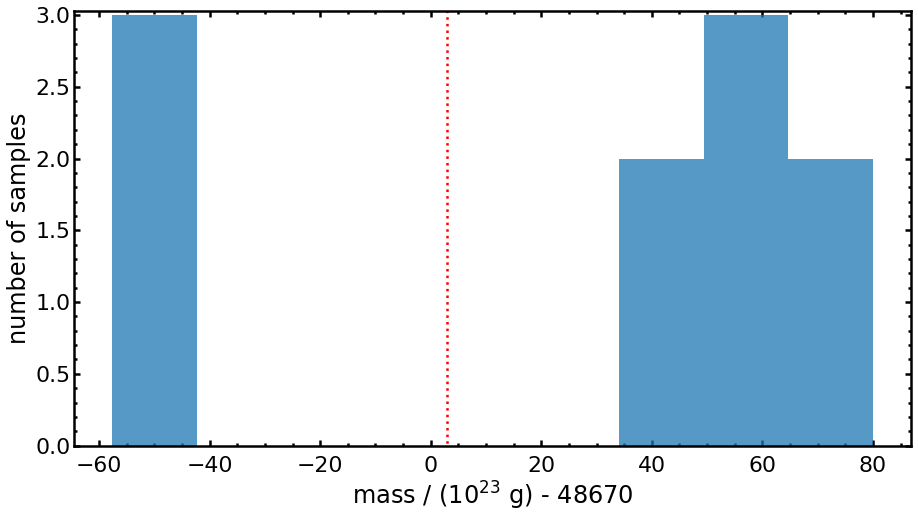

In [66]:
start=time.time()

# MCMC

def lnp(m,sigma,data):
    sigma2 = sigma**2
    n = len(data)
    x = ttv_model(m)
    # print(f'data: {data}')
    # print(f'm: {m}')
    # print(f'model(m): {x}')
    return - sum((data-x)**2)/2/sigma2

actual_mass = 4.8673 # e27
ttv_data = ttv_model(actual_mass)
sigma = 1/3600/24
error = np.random.normal(0,sigma)
ttv_noisy = np.array([ttv_data[i] + np.random.normal(0,sigma) for i in range(len(ttv_data))])

number_of_steps=10

# plt.errorbar(range(1,1+number_of_steps),ttv_noisy/(365*0.25*np.arange(1,1+number_of_steps)**2)-1,yerr=error,ls='none',capsize=5,marker='s',color='k')
# plt.plot(range(1,1+number_of_steps),ttv_data/(365*0.25*np.arange(1,1+number_of_steps)**2)-1)
# plt.xlim(1,number_of_steps)
# plt.show()

mass_guess = 4.8670 # e27
z = mass_guess
step_size = 1000/3600/24
s = step_size
# print(f'\nInitial guess:\n  mass (g)\tstep size\n {z:.4e}\t  {s:.2f}')

zs = [0 for i in range(number_of_steps)]

lnp0 = lnp(z,sigma,ttv_noisy)

accepted=0
count=0
for step in range(number_of_steps):
    jump = s*np.random.normal(0,1) # *1e27
    new_z = z+jump
    # print(f'z: {z}\tjump: {jump}\tnew_z: {new_z}')
    lnp1 = lnp(new_z,sigma,ttv_noisy)
    # print(f'lnp0: {lnp0}\tlnp1: {lnp1}')
    prob = min(1,np.exp(lnp1-lnp0))
    print(f'np.exp(lnp1-lnp0): {np.exp(lnp1-lnp0)}')
    # print(f'prob: {prob}')
    if prob > rand.uniform(0,1):
        z = new_z
        accepted+=1
        lnp0 = lnp1
        # print('ACCEPTED')
    # else:
        # print('NOT ACCEPTED')
    count+=1
    end, time_label = get_elapsed_time(start)
    print(f'\n{step+1} of {number_of_steps} for loops completed in {end:.2f} {time_label}. Current acceptance fraction:\t{accepted/count*100:.2f}%')
    zs[step] = z
print(f'\nAcceptance fraction:\t{accepted/count*100:.2f}%')

masses=np.array(zs)

# os.chdir('/storage/home/nxt5197/work/577_exoplanets/HW10/')

fig,ax = plt.subplots(1)
ax.plot(range(number_of_steps),masses,color='k')
ax.hlines(actual_mass,-1,number_of_steps+1,color='r',linestyle=':')
ax.set_ylabel(r'mass / ($10^{27}$ g)')
ax.set_xlim(0,number_of_steps)
ax.set_xlabel('step number')
plt.show()

print(f'\nMasses: {masses}\n')

spread = [(masses[i]-4.867)*10000 for i in range(len(masses))]
bins = np.linspace(min(spread),max(spread),int(len(spread)/1))
histy,histx,_ = plt.hist(spread,bins=bins,alpha=0.75,align='left')
plt.vlines((actual_mass-4.867)*10000,-1,histy.max()*1.02,linestyles=':',color='r')
plt.ylim(0,histy.max()*1.01)
plt.xlabel(r'mass / ($10^{23}$ g) - 48670')
plt.ylabel('number of samples')
plt.show()

In [60]:
ttv_model(actual_mass)

(array([ 98.84141346, 467.85826946, 836.87128948]),
 [[<scipy.interpolate.interpolate.interp1d at 0x7f94125ea0e0>,
   0],
   0],
   0]],
 [[<scipy.interpolate.interpolate.interp1d at 0x7f94128ae7c0>,
   0],
   0],
   0]])

In [ ]:
ttv_model(actual_mass)

(4.8673,
 array([1564.84266631, 3400.17464167,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]))

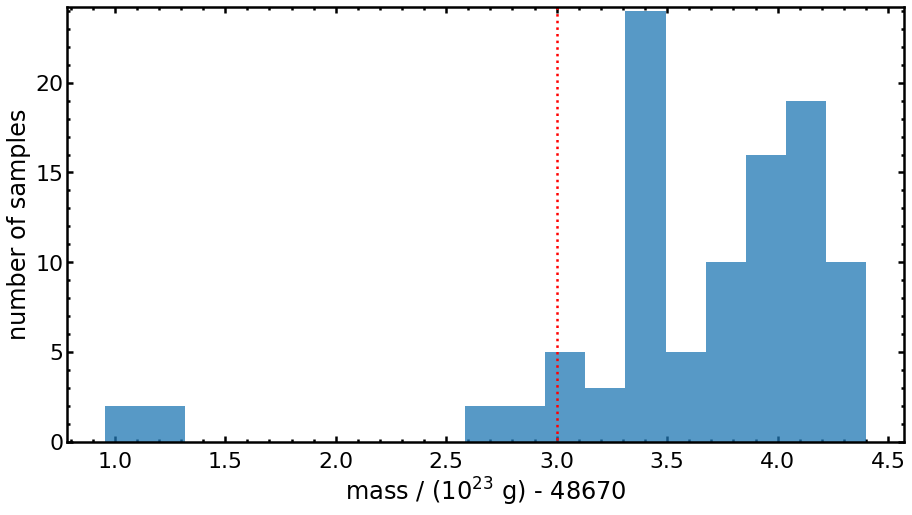

In [ ]:
masses = np.array(('4.8671046 4.8671046 4.86712983 4.86712983 4.86729543 4.86729543 4.86740321 4.86737009 4.86737009 4.86737009 4.8673608 4.8673608 4.86739365 4.86737896 4.86737896 4.86737896 4.86737896 4.86737896 4.86737896 4.86735476 4.86735476 4.86735476 4.86735476 4.86733791 4.86733791 4.867414 4.867414 4.867414 4.867414 4.86735475 4.86735475 4.86735475 4.86744894 4.86744894 4.86744894 4.86744894 4.86735236 4.86735236 4.86735236 4.86735236 4.86731631 4.86731631 4.86731631 4.86731631 4.86731631 4.86743597 4.86743597 4.86743597 4.86743597 4.86743597 4.86743597 4.86732757 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86735391 4.86741191 4.86741191 4.86741191 4.86741191 4.86741191 4.86741191 4.86741191 4.8674206 4.8674206 4.8674206 4.8674206 4.8674206 4.8674206 4.8674206 4.86742701 4.86742701 4.86742701 4.86742701 4.86742701 4.86742701 4.86742701 4.86742701 4.86738963 4.86738963 4.86738963 4.86739624 4.86727418 4.86727418 4.86740568 4.86740568 4.86740568 4.86740568 4.86740568 4.86740568 4.86740568').split(' ')).astype(float)

spread = [(masses[i]-4.867)*10000 for i in range(len(masses))]
bins = np.linspace(min(spread),max(spread),int(len(spread)/5))
histy,histx,_ = plt.hist(spread,bins=bins,alpha=0.75,align='left')
plt.vlines((actual_mass-4.867)*10000,-1,histy.max()*1.02,linestyles=':',color='r')
plt.ylim(0,histy.max()*1.01)
plt.xlabel(r'mass / ($10^{23}$ g) - 48670')
plt.ylabel('number of samples')
plt.savefig('/storage/home/nxt5197/work/577_exoplanets/HW10/HW10_histogram.png',format='png',facecolor='white', transparent=False,bbox_inches='tight')
plt.show()

In [14]:
(29.78*u.km/u.s).to(u.cm/u.day).value

257299200000.0

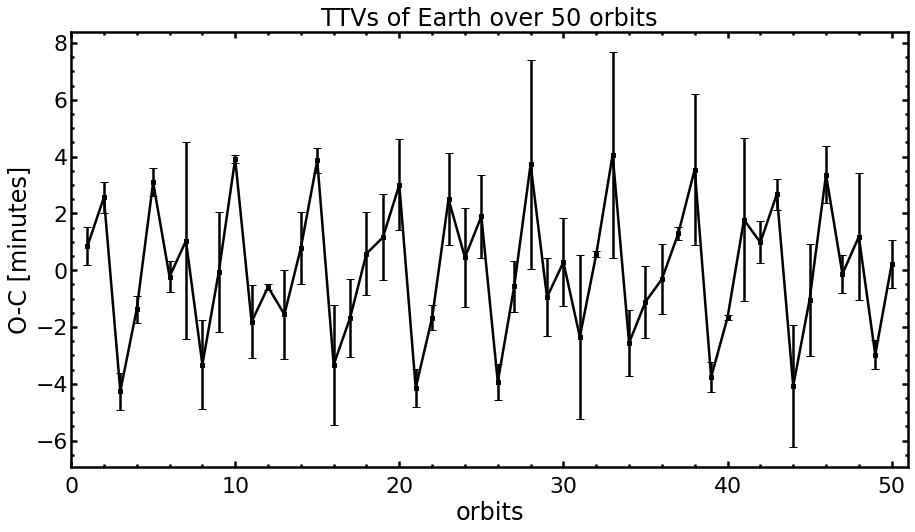

NOT ACCEPTED
1 of 100 for loops completed in 7.20 seconds. Current acceptance fraction:	0.00%

NOT ACCEPTED
2 of 100 for loops completed in 7.35 seconds. Current acceptance fraction:	0.00%

ACCEPTED
3 of 100 for loops completed in 7.42 seconds. Current acceptance fraction:	33.33%

ACCEPTED
4 of 100 for loops completed in 7.28 seconds. Current acceptance fraction:	50.00%

NOT ACCEPTED
5 of 100 for loops completed in 7.12 seconds. Current acceptance fraction:	40.00%

ACCEPTED
6 of 100 for loops completed in 7.46 seconds. Current acceptance fraction:	50.00%

NOT ACCEPTED
7 of 100 for loops completed in 7.36 seconds. Current acceptance fraction:	42.86%

ACCEPTED
8 of 100 for loops completed in 7.39 seconds. Current acceptance fraction:	50.00%

ACCEPTED
9 of 100 for loops completed in 7.18 seconds. Current acceptance fraction:	55.56%

NOT ACCEPTED
10 of 100 for loops completed in 7.30 seconds. Current acceptance fraction:	50.00%

NOT ACCEPTED
11 of 100 for loops completed in 7.12 seconds. C

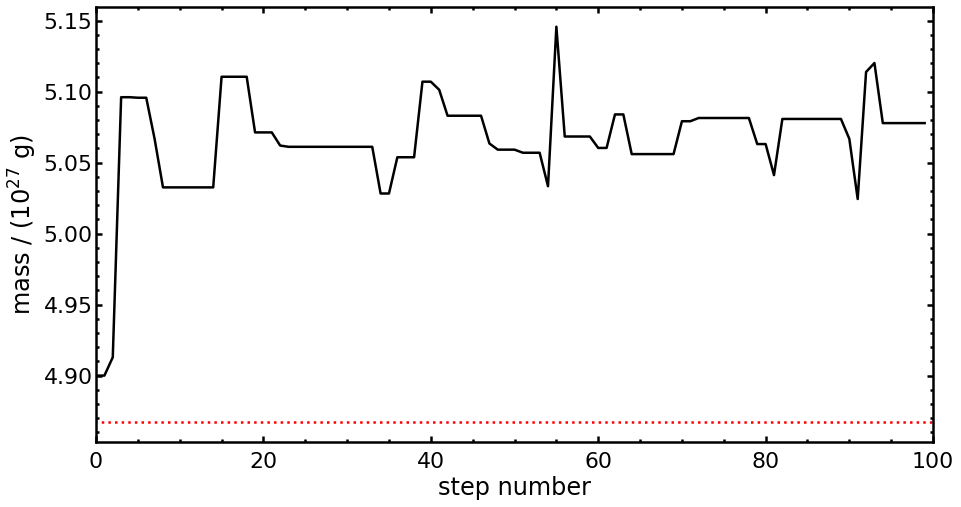

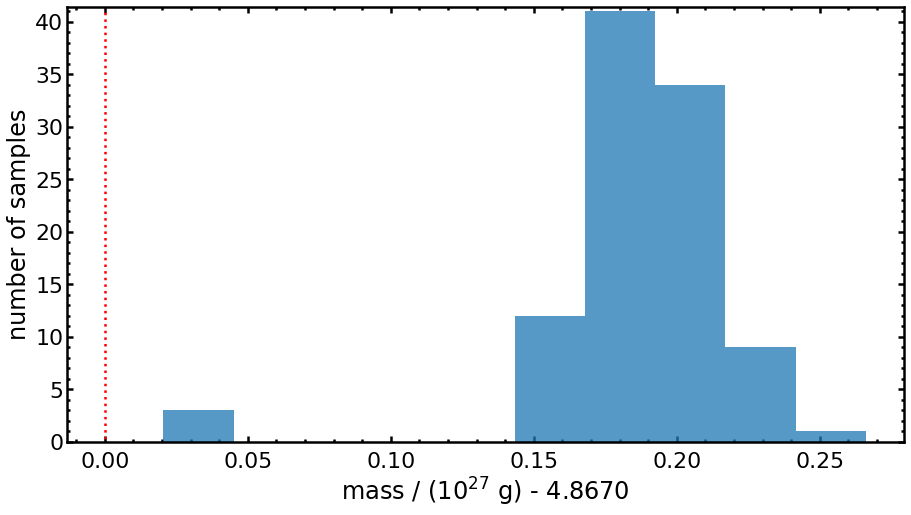

In [3]:
import matplotlib.pyplot as plt
plt.style.use('./accretion.mplstyle')
import numpy as np
import time
import random as rand
from astropy import constants as const
from astropy import units as u
from collections import OrderedDict
from itertools import cycle
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
from scipy import interpolate
from scipy.stats import linregress as linfit
img = mpimg.imread('/storage/home/nxt5197/work/577_exoplanets/eye.png')

def get_elapsed_time(start=0):
    end = time.time() - start
    time_label = 'seconds'    
    if end > 3600:
        end = end/3600
        time_label = 'hours'
    elif end > 60:
        end = end/60
        time_label = 'minutes'
    return end, time_label

# Functions for integrator

def dvidt(M_j,r_ij,r_i,r_j):
    G = 498.2338252799999 # const.G.cgs.to(u.cm**3/u.g/u.day**2).value
    dvdt=[0,0]
    dvdt[0] = -(G*M_j/r_ij**3*(r_i[0] - r_j[0]))
    dvdt[1] = -(G*M_j/r_ij**3*(r_i[1] - r_j[1]))
    return dvdt

def rmag(r_i,r_j):
    x_i=r_i[0]
    y_i=r_i[1]
    x_j=r_j[0]
    y_j=r_j[1]
    return np.sqrt((x_i-x_j)**2+(y_i-y_j)**2)

def r_s_mag(r_i,r_j):
    x_i=r_i[0]
    x_j=r_j[0]
    return x_i-x_j

def get_r_final(r,v,dt):
    x,y = np.add(r,v*dt)
    return x,y

def ttv_model(m_venus,plot_data=False,error=None):

    b = OrderedDict((("Sun",0),("Venus",1),("Earth",2)))

    m_sun = 1.988409870698051e+33 # const.M_sun.to(u.g).value
    m_v = m_venus*1e27 #*u.g # (4.8673*10**27)*u.g
    m_e = 5.972167867791379e+27 # const.M_earth.to(u.g).value
    m = OrderedDict(((0,m_sun),(1,m_v),(2,m_e)))

    AU_cm = 14959787070000.0
    a_v = 0.723*AU_cm # const.au.to(u.cm).value
    a_e = AU_cm # const.au.to(u.cm).value
    a = OrderedDict(((1,a_v),(2,a_e)))
    a_sun = -(m[1]*a[1] + m[2]*a[2])/m_sun
    a = OrderedDict(((0,a_sun),(1,a_v),(2,a_e)))

    v_sun = -1123200.0 # -(0.13*u.m/u.s).to(u.cm/u.day).value
    v_v = 303613056000.0 # 1.18*(29.78*u.km/u.s).to(u.cm/u.day).value
    v_e = 257299200000.0 # (29.78*u.km/u.s).to(u.cm/u.day).value
    vstart = OrderedDict(((0,v_sun),(1,v_v),(2,v_e)))

    # colors = OrderedDict(((0,'white'),(1,'yellow'),(2,'blue')))
    period = OrderedDict(((0,0),(1,0.615),(2,1)))

    # Set timesteps and number of orbits here

    delta_t = 1 # in days

    orbits = 50

    t_range = np.arange(0,orbits*365,delta_t)      # 1 year timescale in steps of delta_t

    # Initialize empty position, velocity, and acceleration arrays
    Dimensions=2
    r = [[[0,0] for i in range(len(t_range))] for i in range(len(b))]
    x = [[0]*len(t_range) for i in range(len(b))]
    y = [[0]*len(t_range) for i in range(len(b))]
    v = [[[0,0] for i in range(len(t_range))] for i in range(len(b))]
    dvdt = [[[0,0] for i in range(len(t_range))] for i in range(len(b))]

    # Set initial position for each body
    for i,bdy in enumerate(b):
        r[i][0][0] = a[i]
        r[i][0][1] = 0
        x[i][0] = r[i][0][0]
        y[i][0] = r[i][0][1]
        v[i][0][0] = 0
        v[i][0][1] = vstart[i]

    # Integrate over all timesteps to get orbital parameters for each body

    steps=len(t_range) # The number of steps in the time array
        
    for t in range(steps-1): # indexing each timestep as t
        # Update the next position for each body
        for i, body in enumerate(b):
            r[i][t+1][0], r[i][t+1][1] = get_r_final(r[i][t],v[i][t],delta_t)
            x[i][t+1], y[i][t+1] = r[i][t+1][0], r[i][t+1][1]

        # r_ij
        r_01 = rmag(r[0][t+1],r[1][t+1])
        r_02 = rmag(r[0][t+1],r[2][t+1])
        r_10 = rmag(r[1][t+1],r[0][t+1])
        r_12 = rmag(r[1][t+1],r[2][t+1])
        r_20 = rmag(r[2][t+1],r[0][t+1])
        r_21 = rmag(r[2][t+1],r[1][t+1])

        # dvdt
        dvdt[0][t] = np.add(dvidt(m[1],r_01,r[0][t+1],r[1][t+1]), dvidt(m[2],r_02,r[0][t+1],r[2][t+1]))
        dvdt[1][t] = np.add(dvidt(m[0],r_10,r[1][t+1],r[0][t+1]), dvidt(m[2],r_12,r[1][t+1],r[2][t+1]))
        dvdt[2][t] = np.add(dvidt(m[0],r_20,r[2][t+1],r[0][t+1]), dvidt(m[1],r_21,r[2][t+1],r[1][t+1]))

        # v
        v[0][t+1] = np.add(v[0][t], dvdt[0][t] * delta_t)
        v[1][t+1] = np.add(v[1][t], dvdt[1][t] * delta_t)
        v[2][t+1] = np.add(v[2][t], dvdt[2][t] * delta_t)

    # Set global functions based on calculated orbital parameter arrays
    xfunc=[0 for i in b]
    yfunc=[0 for i in b]
    vfunc=[[0,0] for i in b]
    afunc=[[0,0] for i in b]
    for i,body in enumerate(b):
        xfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in x[i]])
        yfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in y[i]])
        for D in range(Dimensions):
            vfunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in v[i]])
            afunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in dvdt[i]])

    # FUNCTIONS BELOW ARE TEMPORARILY IN 2D ONLY
    def g(transitting_body,t):
        i = transitting_body
        return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

    def dgdt(transitting_body,t):
        i = transitting_body
        return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

    def get_approx_transits(transitting_body,t_array,num_orbits):
        i = transitting_body
        trange=[int(t) for t in t_array]
        approx_transits = [0 for k in range(num_orbits)]
        orbit=0
        for t in trange:
            if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
                if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                    approx_transits[orbit] = t
                    orbit+=1
        return approx_transits

    def pinpoint_transits(transitting_body,approx_transits):
        count=0
        while max(g(transitting_body,approx_transits)) > 10**-15:
            g_array = g(transitting_body,approx_transits)
            dgdt_array = dgdt(transitting_body,approx_transits)
            approx_transits += - g_array / dgdt_array
            count += 1
            if count == 10:
                print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
                break
        return approx_transits

    num_orbits_earth=int(orbits/period[2])
    approx_transits_earth=get_approx_transits(2,t_range,num_orbits_earth)
    real_transits_earth=pinpoint_transits(2,approx_transits_earth)

    if plot_data==True:
        orbit_range=range(1,len(real_transits_earth)+1)
        reg = linfit(orbit_range,real_transits_earth)
        yerr=[i*60*24 for i in error]
        plt.errorbar(orbit_range, (real_transits_earth-(reg.intercept + reg.slope*orbit_range))*24*60, yerr=yerr,capsize=4,markersize=4,marker='s',color='k')
        plt.ylabel(r'O-C [minutes]')
        plt.xlabel(r'orbits')
        plt.xlim(0,num_orbits_earth+1)
        plt.title(f'TTVs of {list(b.items())[2][0]} over {num_orbits_earth} orbits')
        plt.show()

    return real_transits_earth

# MCMC
for trial in range(1):

    def lnp(m,sigma,data):
        sigma2 = sigma**2
        n = len(data)
        x = ttv_model(m)
        return - sum((data-x)**2)/2/sigma2

    actual_mass = 4.8673 # e27
    sigma = 1/60/24
    error = [np.random.normal(0.9*sigma,1.1*sigma) for i in range(50)]
    ttv_data = ttv_model(actual_mass,plot_data=True,error=error)
    ttv_noisy = np.array([ttv_data[i] + np.random.normal(0.1*sigma,10*sigma) for i in range(len(ttv_data))])

    number_of_steps=100

    mass_guess = 4.9 # e27
    z = mass_guess
    step_size = 0.1
    s = step_size

    zs = [0 for i in range(number_of_steps)]

    lnp0 = lnp(z,sigma,ttv_noisy)

    accepted=0
    count=0
    for step in range(number_of_steps):
        # lnp0 = lnp(z,sigma,ttv_noisy)
        start = time.time()
        jump = s*np.random.normal(0,1) # *1e27
        new_z = z+jump
        # print(f'z: {z}\tjump: {jump}\tnew_z: {new_z}')
        lnp1 = lnp(new_z,sigma,ttv_noisy)
        # print(f'lnp0: {lnp0}\tlnp1: {lnp1}')
        # print(f'np.exp(lnp1-lnp0): {np.exp(lnp1-lnp0)}')
        prob = min(1,np.exp(lnp1-lnp0))
        # print(f'prob: {prob}')
        if prob > rand.uniform(0,1):
            z = new_z
            accepted+=1
            lnp0 = lnp1
            print('ACCEPTED')
        else:
            print('NOT ACCEPTED')
        count+=1
        end, time_label = get_elapsed_time(start)
        # with open(counter_file, 'a') as f:
        print(f'{step+1} of {number_of_steps} for loops completed in {end:.2f} {time_label}. Current acceptance fraction:\t{accepted/count*100:.2f}%\n')
        zs[step] = z
        # print(f'zs: {[zs]}')
    print(f'\nTrial {trial} acceptance fraction:\t{accepted/count*100:.2f}%')

    masses=np.array(zs)

    fig,ax = plt.subplots(1)
    ax.plot(range(number_of_steps),masses,color='k')
    ax.hlines(actual_mass,-1,number_of_steps+1,color='r',linestyle=':')
    ax.set_ylabel(r'mass / ($10^{27}$ g)')
    ax.set_xlim(0,number_of_steps)
    ax.set_xlabel('step number')
    # plt.savefig(f'HW10_m_v_steps{trial}.png',format='png')
    plt.show()

    spread = [(masses[i]-actual_mass) for i in range(len(masses))]
    # bins = np.linspace(min(spread),max(spread),int(len(spread)/5))
    histy,histx,_ = plt.hist(spread,alpha=0.75,align='left')
    plt.vlines(0,-1,histy.max()*1.02,linestyles=':',color='r')
    plt.ylim(0,histy.max()*1.01)
    plt.xlabel(r'mass / ($10^{27}$ g) - 4.8670')
    plt.ylabel('number of samples')
    # plt.savefig(f'HW10_histogram{trial}.png',format='png',bbox_inches='tight')
    plt.show()

Text(0, 0.5, 'number of samples')

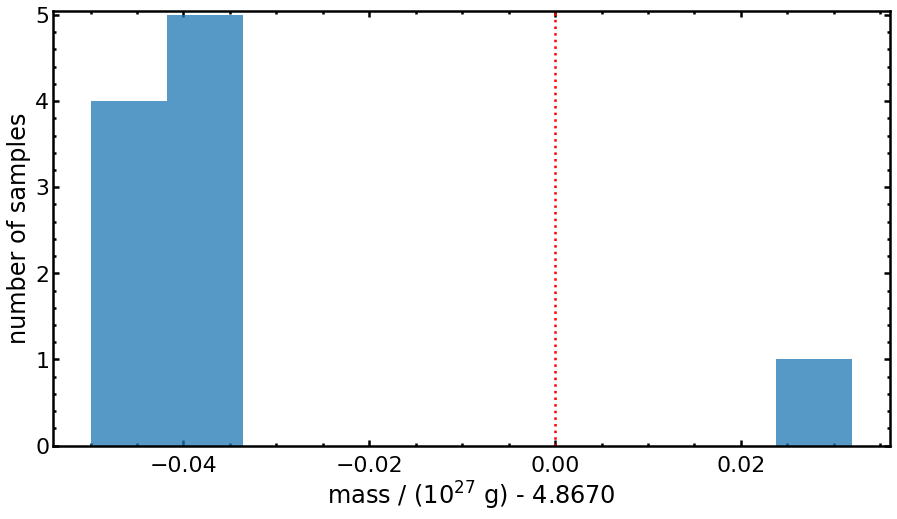

In [5]:
spread = [(masses[i]-actual_mass) for i in range(len(masses))]
# bins = np.linspace(min(spread),max(spread),int(len(spread)/5))
histy,histx,_ = plt.hist(spread,alpha=0.75,align='left')
plt.vlines(0,-1,histy.max()*1.02,linestyles=':',color='r')
plt.ylim(0,histy.max()*1.01)
plt.xlabel(r'mass / ($10^{27}$ g) - 4.8670')
plt.ylabel('number of samples')
# plt.savefig(f'HW10_histogram{trial}.png',format='png',bbox_inches='tight')
# plt.close()

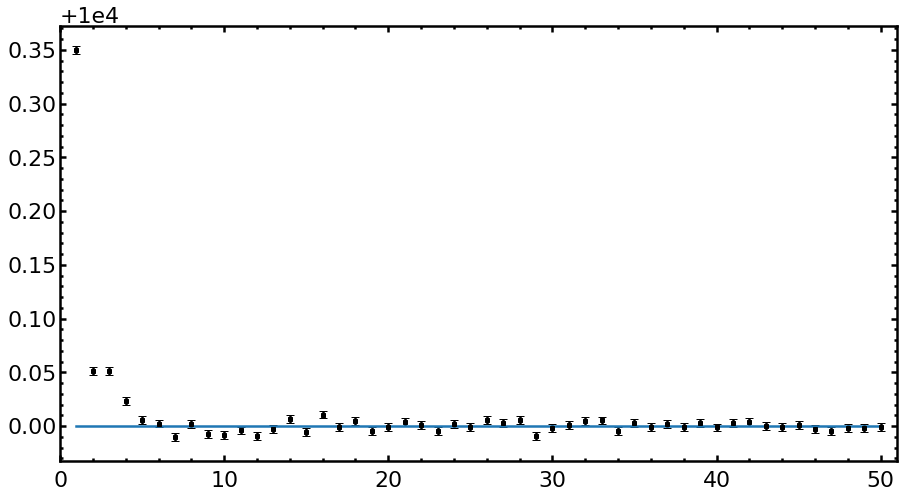

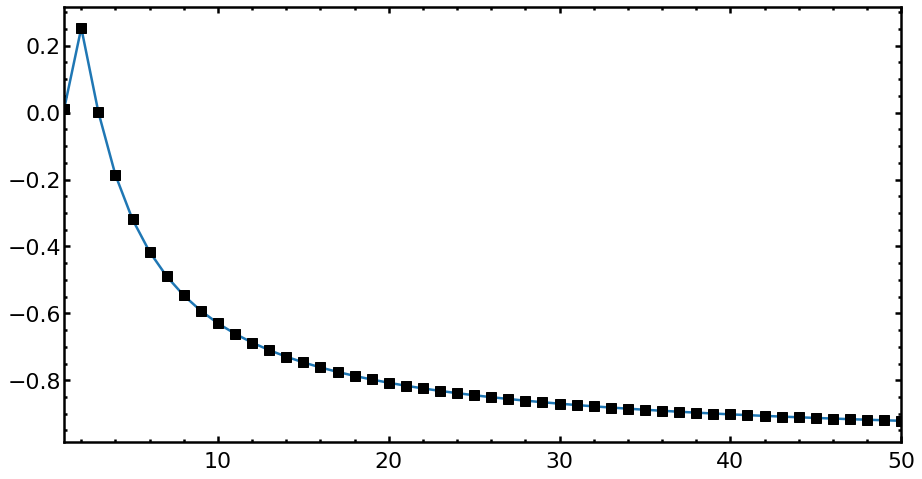

In [41]:
actual_mass = 4.8673 # e27
ttv_data = ttv_model(actual_mass)
sigma = np.random.normal(0.1/60/24,10/60/24)
error = sigma
ttv_noisy = np.array([ttv_data[i] + np.random.normal(0,sigma) for i in range(len(ttv_data))])

plt.errorbar(range(1,1+len(ttv_noisy)),ttv_noisy/ttv_data*1e4,yerr=error,ls='none',capsize=4,markersize=4,marker='s',color='k')
plt.plot(range(1,1+len(ttv_noisy)),ttv_data/ttv_data*1e4)
plt.xlim(0,len(ttv_noisy)+1)
plt.show()

plt.errorbar(range(1,1+len(ttv_noisy)),ttv_noisy/(365*0.25*np.arange(1,1+len(ttv_noisy))**2)-1,yerr=error,ls='none',capsize=5,marker='s',color='k')
plt.plot(range(1,1+len(ttv_noisy)),ttv_data/(365*0.25*np.arange(1,1+len(ttv_noisy))**2)-1)
plt.xlim(1,len(ttv_noisy))
plt.show()

In [42]:
number_of_steps,len(ttv_noisy),error

(10, 50, 0.0036585898696899076)

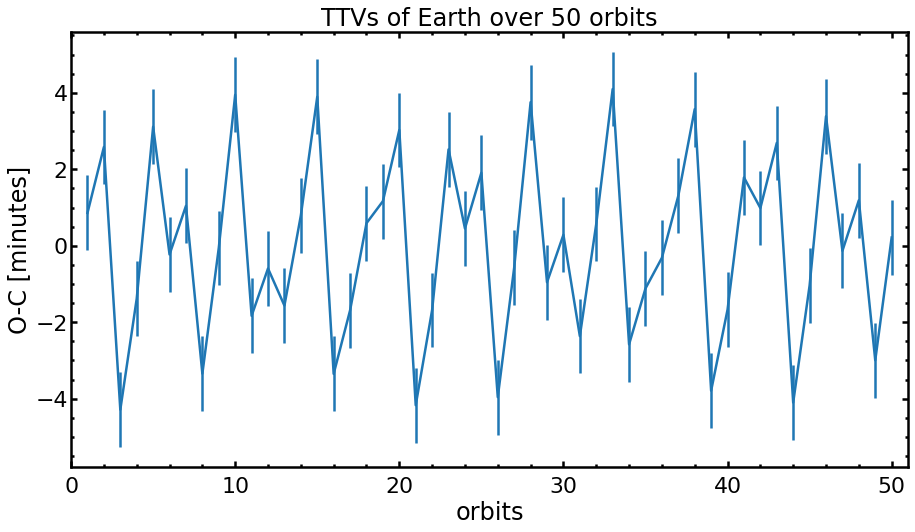

In [11]:
m_venus=4.9

b = OrderedDict((("Sun",0),("Venus",1),("Earth",2)))

m_sun = 1.988409870698051e+33 # const.M_sun.to(u.g).value
m_v = m_venus*1e27 #*u.g # (4.8673*10**27)*u.g
m_e = 5.972167867791379e+27 # const.M_earth.to(u.g).value
m = OrderedDict(((0,m_sun),(1,m_v),(2,m_e)))

AU_cm = 14959787070000.0
a_v = 0.723*AU_cm # const.au.to(u.cm).value
a_e = AU_cm # const.au.to(u.cm).value
a = OrderedDict(((1,a_v),(2,a_e)))
a_sun = -(m[1]*a[1] + m[2]*a[2])/m_sun
a = OrderedDict(((0,a_sun),(1,a_v),(2,a_e)))

v_sun = -1123200.0 # -(0.13*u.m/u.s).to(u.cm/u.day).value
v_v = 303613056000.0 # 1.18*(29.78*u.km/u.s).to(u.cm/u.day).value
v_e = 257299200000.0 # (29.78*u.km/u.s).to(u.cm/u.day).value
vstart = OrderedDict(((0,v_sun),(1,v_v),(2,v_e)))

# colors = OrderedDict(((0,'white'),(1,'yellow'),(2,'blue')))
period = OrderedDict(((0,0),(1,0.615),(2,1)))

# Set timesteps and number of orbits here

delta_t = 1 # in days

orbits = 50

t_range = np.arange(0,orbits*365,delta_t)      # 1 year timescale in steps of delta_t

# Initialize empty position, velocity, and acceleration arrays
Dimensions=2
r = [[[0,0] for i in range(len(t_range))] for i in range(len(b))]
x = [[0]*len(t_range) for i in range(len(b))]
y = [[0]*len(t_range) for i in range(len(b))]
v = [[[0,0] for i in range(len(t_range))] for i in range(len(b))]
dvdt = [[[0,0] for i in range(len(t_range))] for i in range(len(b))]

# Set initial position for each body
for i,bdy in enumerate(b):
    r[i][0][0] = a[i]
    r[i][0][1] = 0
    x[i][0] = r[i][0][0]
    y[i][0] = r[i][0][1]
    v[i][0][0] = 0
    v[i][0][1] = vstart[i]

# Integrate over all timesteps to get orbital parameters for each body

steps=len(t_range) # The number of steps in the time array
    
for t in range(steps-1): # indexing each timestep as t
    # Update the next position for each body
    for i, body in enumerate(b):
        r[i][t+1][0], r[i][t+1][1] = get_r_final(r[i][t],v[i][t],delta_t)
        x[i][t+1], y[i][t+1] = r[i][t+1][0], r[i][t+1][1]

    # r_ij
    r_01 = rmag(r[0][t+1],r[1][t+1])
    r_02 = rmag(r[0][t+1],r[2][t+1])
    r_10 = rmag(r[1][t+1],r[0][t+1])
    r_12 = rmag(r[1][t+1],r[2][t+1])
    r_20 = rmag(r[2][t+1],r[0][t+1])
    r_21 = rmag(r[2][t+1],r[1][t+1])

    # dvdt
    dvdt[0][t] = np.add(dvidt(m[1],r_01,r[0][t+1],r[1][t+1]), dvidt(m[2],r_02,r[0][t+1],r[2][t+1]))
    dvdt[1][t] = np.add(dvidt(m[0],r_10,r[1][t+1],r[0][t+1]), dvidt(m[2],r_12,r[1][t+1],r[2][t+1]))
    dvdt[2][t] = np.add(dvidt(m[0],r_20,r[2][t+1],r[0][t+1]), dvidt(m[1],r_21,r[2][t+1],r[1][t+1]))

    # v
    v[0][t+1] = np.add(v[0][t], dvdt[0][t] * delta_t)
    v[1][t+1] = np.add(v[1][t], dvdt[1][t] * delta_t)
    v[2][t+1] = np.add(v[2][t], dvdt[2][t] * delta_t)

# Set global functions based on calculated orbital parameter arrays
xfunc=[0 for i in b]
yfunc=[0 for i in b]
vfunc=[[0,0] for i in b]
afunc=[[0,0] for i in b]
for i,body in enumerate(b):
    xfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in x[i]])
    yfunc[i] = interpolate.interp1d([t for t in t_range],[k for k in y[i]])
    for D in range(Dimensions):
        vfunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in v[i]])
        afunc[i][D] = interpolate.interp1d([t for t in t_range],[k[D] for k in dvdt[i]])

# FUNCTIONS BELOW ARE TEMPORARILY IN 2D ONLY
def g(transitting_body,t):
    i = transitting_body
    return (xfunc[i](t)-xfunc[0](t))*(vfunc[i][0](t)-vfunc[0][0](t))

def dgdt(transitting_body,t):
    i = transitting_body
    return (vfunc[i][0](t)-vfunc[0][0](t))**2+(xfunc[i](t)-xfunc[0](t))*(afunc[i][0](t)-afunc[0][0](t))

def get_approx_transits(transitting_body,t_array,num_orbits):
    i = transitting_body
    trange=[int(t) for t in t_array]
    approx_transits = [0 for k in range(num_orbits)]
    orbit=0
    for t in trange:
        if yfunc[i](t)>0 and t>trange[0] and t<trange[-1]:
            if abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t-1)-xfunc[0](t-1)) and abs(xfunc[i](t)-xfunc[0](t)) < abs(xfunc[i](t+1)-xfunc[0](t+1)):
                approx_transits[orbit] = t
                orbit+=1
    return approx_transits

def pinpoint_transits(transitting_body,approx_transits):
    count=0
    while max(g(transitting_body,approx_transits)) > 10**-15:
        g_array = g(transitting_body,approx_transits)
        dgdt_array = dgdt(transitting_body,approx_transits)
        approx_transits += - g_array / dgdt_array
        count += 1
        if count == 10:
            print(f'You fucked up. Count: {count}.\nBreaking While Loop Manually.')
            break
    return approx_transits

num_orbits=50
orbits = 50
delta_t = 1
t_range = np.arange(0,orbits*365,delta_t)
approx_transits = get_approx_transits(2,t_range,num_orbits)
real_transits=pinpoint_transits(2,approx_transits)
orbit_range=range(1,len(real_transits)+1)
reg = linfit(orbit_range,real_transits)
plt.errorbar(orbit_range, (real_transits-(reg.intercept + reg.slope*orbit_range))*24*60, yerr=error*1e3)
plt.ylabel(r'O-C [minutes]')
plt.xlabel(r'orbits')
plt.xlim(0,num_orbits+1)
plt.title(f'TTVs of {list(b.items())[2][0]} over {num_orbits} orbits')
plt.show()

In [16]:
(reg.slope*orbit_range+reg.intercept)*24

array([  2215.59827808,  10979.63008137,  19743.66188466,  28507.69368795,
        37271.72549124,  46035.75729453,  54799.78909782,  63563.82090111,
        72327.8527044 ,  81091.88450769,  89855.91631098,  98619.94811427,
       107383.97991756, 116148.01172085, 124912.04352414, 133676.07532743,
       142440.10713072, 151204.13893401, 159968.1707373 , 168732.20254059,
       177496.23434388, 186260.26614717, 195024.29795046, 203788.32975375,
       212552.36155704, 221316.39336033, 230080.42516362, 238844.45696691,
       247608.4887702 , 256372.52057349, 265136.55237678, 273900.58418006,
       282664.61598335, 291428.64778664, 300192.67958993, 308956.71139322,
       317720.74319651, 326484.7749998 , 335248.80680309, 344012.83860638,
       352776.87040967, 361540.90221296, 370304.93401625, 379068.96581954,
       387832.99762283, 396597.02942612, 405361.06122941, 414125.0930327 ,
       422889.12483599, 431653.15663928])

<ErrorbarContainer object of 3 artists>

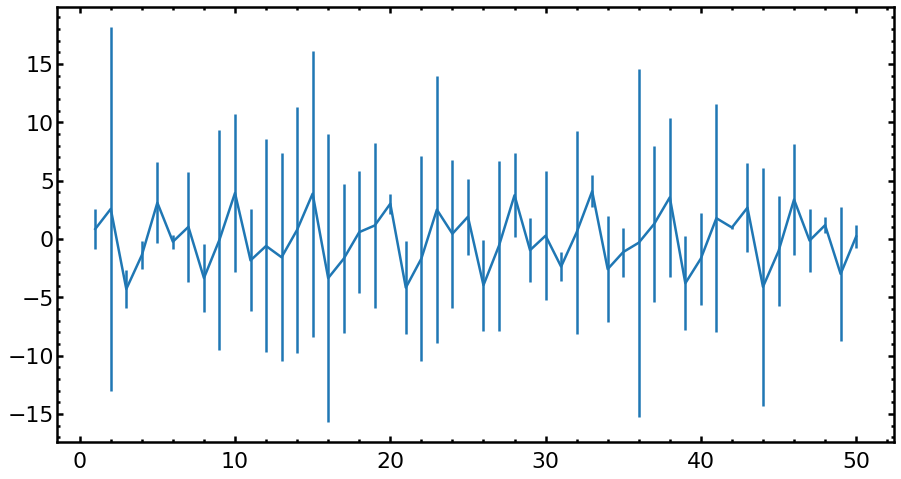

In [19]:
error = [np.random.normal(0.1*sigma,10*sigma)*1e3 for i in range(len(ttv_data))]
plt.errorbar(orbit_range, (real_transits-(reg.intercept + reg.slope*orbit_range))*24*60, yerr=error)